In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#Importing libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import nltk.data
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
df = pd.read_excel('../input/blog-data/final_data_17406.xlsx')
df.head()


,authors,category,content,date,id,img_src,section,title,topics,url,startups,mobile,apps,social,gadgets,europe,enterprise
0,Lora Kolodny,Government,Investigative reporter and co-founder of Democ...,2016-10-15,1402133,https://tctechcrunch2011.files.wordpress.com/2...,enterprise/,Multi-media journalists face jail time after r...,edward-snowden,https://techcrunch.com/2016/10/15/multi-media-...,0,0,0,1,0,0,0
1,Keith Teare,Social,\n\nThe problems associated with the widesprea...,2016-10-07,1398512,https://tctechcrunch2011.files.wordpress.com/2...,social/,The case for Twitter’s independence (unless Go...,twitter,https://techcrunch.com/2016/10/07/you-cannot-t...,0,0,0,1,0,0,0
2,Frederic Lardinois,Cloud,"OpenStack, the massive open source project tha...",2016-10-06,1398065,https://tctechcrunch2011.files.wordpress.com/2...,enterprise/,OpenStack’s latest release focuses on scalabil...,NaN,https://techcrunch.com/2016/10/06/openstacks-l...,0,0,0,0,0,0,1
3,Haje Jan Kamps,Europe,It’s been just over a year since Adobe launche...,2016-10-05,1396326,https://tctechcrunch2011.files.wordpress.com/2...,europe/,Adobe teams up with EyeEm to expand its stock ...,NaN,https://techcrunch.com/2016/10/05/adobe-eyeem-...,1,1,0,0,0,1,0
4,Dr. Nancy Markley,Startups,\n\nMany startup companies begin with either a...,2016-10-04,1396165,https://tctechcrunch2011.files.wordpress.com/2...,startups/,Due diligence is a responsibility for investor...,NaN,https://techcrunch.com/2016/10/04/due-diligenc...,1,0,0,0,0,0,0


In [15]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
#df.drop(['id','date','img_src','section','topics','url'],axis=1,inplace=True)
df_main = df[['content','title','startups','mobile','apps','social','gadgets','europe','enterprise']]
df_main.dropna(inplace=True)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [16]:
df_main['content'] = df_main['content'].str.lstrip()
df_main['title'] = df_main['title'].str.lstrip()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
def checking_Data(index):
    row = df_main[df_main.index == index][['title', 'content']].values[0]
    if len(row) > 0:
        print('Title:',row[0])
        print('Content:',row[1])        
checking_Data(0)

Title: Multi-media journalists face jail time after reporting on North Dakota pipeline protest
Content: Investigative reporter and co-founder of Democracy Now!, Amy Goodman, is now facing riot charges in the state of North Dakota after her report on a Native American-led pipeline protest there went viral on Facebook.
Democracy Now! issued a statement about the new charges against Goodman late Saturday.
The news organization, which spun out of WBAI-FM, creates programming which is syndicated via radio, podcasts, cable television, public access television, live streams and Web downloads.
Goodman’s story, posted to Facebook on September 4th, has been viewed more than 14 million times on the social media platform, Democracy Now! said, and was picked up by mainstream media outlets and networks including CBS, NBC, NPR, CNN, MSNBC and The Huffington Post (a site owned by TechCrunch’s parent company Verizon).
Additionally, documentary filmmaker Deia Schlosberg, is facing felony and conspiracy 

In [18]:
#Cleansing Content and Tags:
replace_blank_regex = re.compile('[/(){}\[\]\|@,;]')
symbols_removel_regex = re.compile('[^0-9a-z #+_$%-.,]')
stopword_det = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = replace_blank_regex.sub(' ', text) # replace replace_blank_regex symbols by space in text
    text = symbols_removel_regex.sub('', text) # delete symbols which are in symbols_removel_regex from text
    #text = ' '.join(word for word in text.split() if word not in stopword_det) # delete stopwors from text
    return text
    
df_main['content'] = df_main['content'].apply(clean_text)
df_main['title'] = df_main['title'].apply(clean_text)
checking_Data(0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Title: multi-media journalists face jail time after reporting on north dakota pipeline protest
Content: investigative reporter and co-founder of democracy now  amy goodman  is nowfacing riot charges in the state of north dakota after her report on a native american-led pipeline protest there went viral on facebook.democracy now issued a statement about the new charges against goodman late saturday.the news organization  which spun out of wbai-fm  creates programming which is syndicated via radio  podcasts  cable television  public access television  live streams and web downloads.goodmans story  posted to facebook on september 4th  has been viewed more than 14 million times on the social media platform  democracy now said  and was picked up by mainstream media outlets and networks including cbs  nbc  npr  cnn  msnbc and the huffington post  a site owned by techcrunchs parent company verizon .additionally  documentary filmmaker deia schlosberg  is facing felony and conspiracy charges th

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
#Lemmatizing Content and Title:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    lem_sentence=[]
    lem_sentence= [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

    return " ".join(lem_sentence) 
    
df_main['content_lemmatized'] = df_main.content.apply(lemmatize_text)
df_main['title_lemmatized'] = df_main.title.apply(lemmatize_text)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [20]:
#Combining Content+Title:
df_main['content+title'] = df_main['title_lemmatized']+' '+df_main['content_lemmatized']
df_main['content+title'].head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    multi-media journalist face jail time after re...
1    the case for twitter independence unless googl...
2    openstacks latest release focus on scalability...
3    adobe team up with eyeem to expand it stock ph...
4    due diligence is a responsibility for investor...
Name: content+title, dtype: object

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, GlobalMaxPooling1D,SpatialDropout1D
from keras.layers import Embedding, GRU, Bidirectional
from keras.utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs

sns.set_style("whitegrid")
np.random.seed(0)

DATA_PATH = '../input/'
EMBEDDING_DIR = '../input/'


MAX_NB_WORDS = 100000
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}'])

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

blog-data
fasttext
fasttext-crawl-300d-2m
model-keras



In [11]:
#load embeddings
print('loading word embeddings...')
embeddings_index = {}
f = codecs.open('../input/fasttext-crawl-300d-2m/crawl-300d-2M.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

931it [00:00, 9175.23it/s]

loading word embeddings...


2000005it [03:40, 9083.64it/s]

found 1999997 word vectors


num train:  17386


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


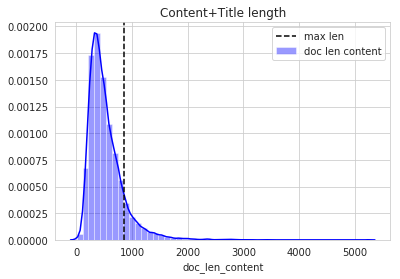

In [52]:
#New Code for reading data:
#load data
train_df = df_main
print("num train: ", train_df.shape[0])


label_names = ['startups','mobile','apps','social','gadgets','europe','enterprise']
y_train = train_df[label_names].values

#visualize word distribution for Content+Title:
train_df['doc_len_content'] = train_df['content+title'].apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(train_df['doc_len_content'].mean() + train_df['doc_len_content'].std()).astype(int)
sns.distplot(train_df['doc_len_content'], hist=True,kde=True, 
             color='b', label='doc len content')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Content+Title length'); plt.legend()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_df, y_train, test_size=0.2, random_state=42)

In [24]:
#New Code for tokenizing "Content":
from keras.preprocessing.text import Tokenizer
tokenizer = RegexpTokenizer(r'\w+')
raw_docs_train = X_train['content+title'].tolist()
raw_docs_test = X_test['content+title'].tolist() 
 
num_classes = len(label_names)

print("pre-processing train data...")
processed_docs_train = []
for doc in tqdm(raw_docs_train):
    tokens = tokenizer.tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_train.append(" ".join(filtered))
#end for

print("pre-processing test data...")
processed_docs_test = []
for doc in tqdm(raw_docs_test):
    tokens = tokenizer.tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_test.append(" ".join(filtered))
#end for

print("tokenizing input data...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer.fit_on_texts(processed_docs_train + processed_docs_test)#leaky
word_seq_train = tokenizer.texts_to_sequences(processed_docs_train)
word_seq_test = tokenizer.texts_to_sequences(processed_docs_test)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))

#pad sequences
word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len)
word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len)

  3%|▎         | 447/13908 [00:00<00:03, 4463.88it/s]

pre-processing train data...


 13%|█▎        | 453/3478 [00:00<00:00, 4521.06it/s]

pre-processing test data...


100%|██████████| 3478/3478 [00:00<00:00, 4564.69it/s]


tokenizing input data...
dictionary size:  162089


In [25]:
word_seq_train.shape

(13908, 856)

In [26]:
#training params
batch_size = 256
num_epochs = 10

#model parameters
num_filters = 64 
embed_dim = 300 
weight_decay = 1e-4

In [27]:
#embedding matrix for content:
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_dim))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 47378


In [28]:
embedding_matrix.shape

(100000, 300)

In [29]:
print("sample words not found: ", np.random.choice(words_not_found, 10))

sample words not found:  ['dubset' 'macgown' 'licensespart' 'expeditefurther' 'competitorseminence'
 'improveunderwater' 'whenmicrosofts' 'fotoablea' 'alsoimmediately'
 'endeavorsand']


In [32]:
#RNN architecture

print("training RNN-GRU ...")
model = Sequential()
model.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False))
model.add(SpatialDropout1D(0.20))
model.add(Bidirectional(GRU(256, return_sequences=True, dropout=0.20, recurrent_dropout=0.1)))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.20))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dropout(0.20))
model.add(Dense(7, activation='sigmoid'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','categorical_accuracy'])

earlyStopping = EarlyStopping(monitor='val_loss', patience=4, verbose=0, mode='min')
mcp_save = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(word_seq_train, Y_train, validation_split=0.1, batch_size=128, 
                    epochs=10,callbacks=[earlyStopping,mcp_save,reduce_lr_loss])
model.summary()

from keras.models import load_model
model.save('my_model.h5')


training RNN-GRU ...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 12517 samples, validate on 1391 samples
Epoch 1/10
12517/12517 [==============================] - 278s 22ms/step - loss: 0.4787 - acc: 0.7824 - categorical_accuracy: 0.4869 - val_loss: 0.3544 - val_acc: 0.8503 - val_categorical_accuracy: 0.5938
Epoch 2/10
12517/12517 [==============================] - 273s 22ms/step - loss: 0.3587 - acc: 0.8434 - categorical_accuracy: 0.5733 - val_loss: 0.3113 - val_acc: 0.8660 - val_categorical_accuracy: 0.6068
Epoch 3/10
12517/12517 [==============================] - 273s 22ms/step - loss: 0.3223 - acc: 0.8634 - categorical_accuracy: 0.5979 - val_loss: 0.2920 - val_acc: 0.8762 - val_categorical_accuracy: 0.6003
Epoch 4/10
12517/12517 [==============================] - 271s 22ms/step - loss: 0.3021 - acc: 0.8741 - categorical_accuracy: 0.6040 - val_loss: 0.2852 - val_acc: 0.8822 - val_categorical_accuracy: 0.6233
Epoch 5/10
12517/12517 [=============================

In [33]:
model.load_weights('best_model.hdf5')

In [ ]:
###############################################################
#import os
#print(os.listdir("../input/model-keras"))

In [ ]:
#from keras.models import load_model
#model = load_model('../input/model-keras/my_model.h5')

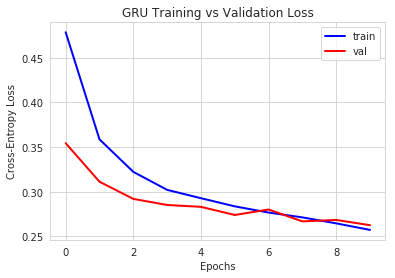

In [39]:
#Loss plots
plt.figure()
plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('GRU Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

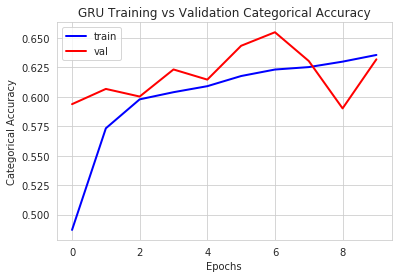

In [40]:
#Categorical Accuracy plot:
plt.figure()
plt.plot(history.history['categorical_accuracy'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_categorical_accuracy'], lw=2.0, color='r', label='val')
plt.title('GRU Training vs Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.legend(loc='upper left')
plt.show()

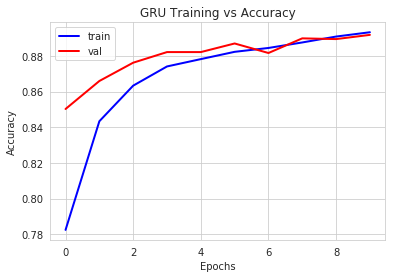

In [41]:
#Accuracy plot:
plt.figure()
plt.plot(history.history['acc'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_acc'], lw=2.0, color='r', label='val')
plt.title('GRU Training vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [50]:
#Predicting:
y_pred = model.predict(word_seq_test, batch_size=256, verbose=1)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.apply(lambda x: [0 if y <= 0.5 else 1 for y in x])
y_pred.head()

3478/3478 [==============================] - 16s 5ms/step


,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,1,1,0,0,1,0


In [51]:
from sklearn.metrics import classification_report,accuracy_score
print("classification_report",classification_report(Y_test,y_pred))
print("accuracy_score",accuracy_score(Y_test,y_pred))
from sklearn.metrics import hamming_loss
print("hamming_loss",hamming_loss(Y_test,y_pred))


classification_report               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1606
           1       0.73      0.80      0.77      1070
           2       0.72      0.63      0.67       770
           3       0.77      0.73      0.75       758
           4       0.86      0.86      0.86       689
           5       0.90      0.78      0.83       599
           6       0.85      0.62      0.72       430

   micro avg       0.79      0.76      0.78      5922
   macro avg       0.80      0.75      0.77      5922
weighted avg       0.79      0.76      0.77      5922
 samples avg       0.82      0.80      0.78      5922

accuracy_score 0.5005750431282346
hamming_loss 0.10732769243407542


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
